### Imports

In [1]:
from jupyterthemes import jtplot
from scripts.utils import dataset_from_file,apriori,format_output
from scripts.conversion_utils import to_df,df_with_reverse

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# plot with theme
jtplot.style()

# notifications
%reload_ext jupyternotify
%autonotify -a 30

<IPython.core.display.Javascript object>

### Inputs

In [2]:
delimeter = ","
T = dataset_from_file("datasets/dataset.txt", delimeter)
eps = 3
verbose = False

###  Processing...

In [3]:
%%notify -m "Proceced data"
res = apriori(T, eps, verbose)
format_output(res)

element         value    support    confidence reversed   lift       reversed  
  1               6       0.857    -99.000    -99.000    -99.000    -99.000
  5               5       0.714    -99.000    -99.000    -99.000    -99.000
  2               5       0.714    -99.000    -99.000    -99.000    -99.000
  5-1             4       0.571      0.800      0.667      0.933      1.120
  2-5             4       0.571      0.800      0.800      1.120      1.120
  2-1             4       0.571      0.800      0.667      0.933      1.120
  2-5-1           3       0.429      0.750      0.500      0.875      1.312
  4-1             3       0.429      1.000      0.500      1.167      2.333
  4               3       0.429    -99.000    -99.000    -99.000    -99.000
  3               3       0.429    -99.000    -99.000    -99.000    -99.000


<IPython.core.display.Javascript object>

### Vizualisation

##### Convert it to pandas dataframe

In [4]:
import pandas as pd
data = to_df(res)
data

,value,support,confidence,lift,confidence-reverse,lift-reverse
1,6,0.857143,-99.00,-99.000000,-99.000000,-99.000000
5,5,0.714286,-99.00,-99.000000,-99.000000,-99.000000
2,5,0.714286,-99.00,-99.000000,-99.000000,-99.000000
5-1,4,0.571429,0.80,0.933333,0.666667,1.120000
2-5,4,0.571429,0.80,1.120000,0.800000,1.120000
2-1,4,0.571429,0.80,0.933333,0.666667,1.120000
2-5-1,3,0.428571,0.75,0.875000,0.500000,1.312500
4-1,3,0.428571,1.00,1.166667,0.500000,2.333333
4,3,0.428571,-99.00,-99.000000,-99.000000,-99.000000
3,3,0.428571,-99.00,-99.000000,-99.000000,-99.000000


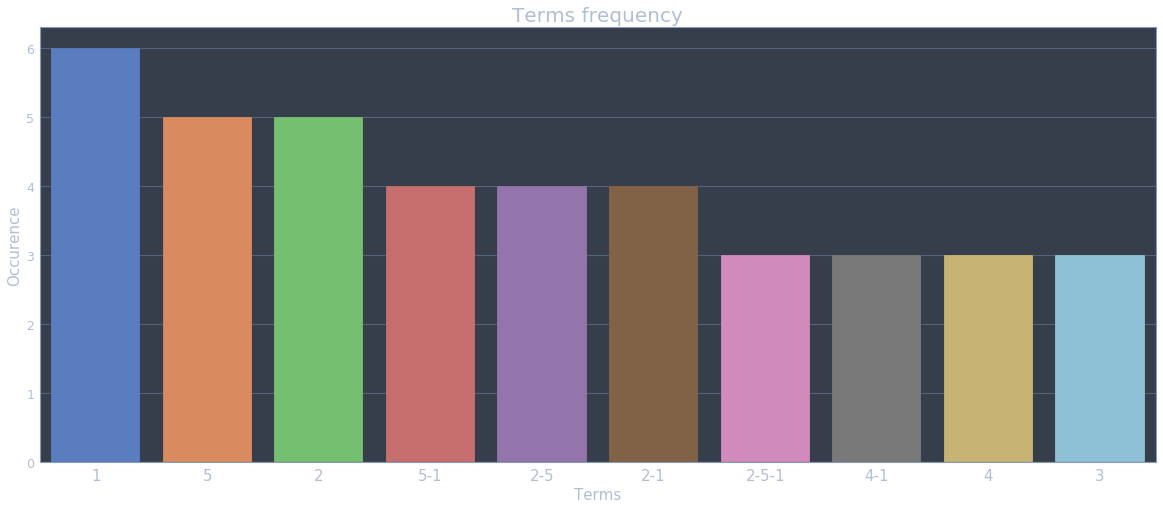

In [5]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="index", y="value",
                 data=data.reset_index(), palette="muted")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_ylabel(ax.get_ylabel(), fontsize=15)
ax.set_title('Terms frequency', fontsize=20)
ax.set_ylabel('Occurence', fontsize=15)
ax.set_xlabel('Terms', fontsize=15); 

In [6]:
data

,value,support,confidence,lift,confidence-reverse,lift-reverse
1,6,0.857143,-99.00,-99.000000,-99.000000,-99.000000
5,5,0.714286,-99.00,-99.000000,-99.000000,-99.000000
2,5,0.714286,-99.00,-99.000000,-99.000000,-99.000000
5-1,4,0.571429,0.80,0.933333,0.666667,1.120000
2-5,4,0.571429,0.80,1.120000,0.800000,1.120000
2-1,4,0.571429,0.80,0.933333,0.666667,1.120000
2-5-1,3,0.428571,0.75,0.875000,0.500000,1.312500
4-1,3,0.428571,1.00,1.166667,0.500000,2.333333
4,3,0.428571,-99.00,-99.000000,-99.000000,-99.000000
3,3,0.428571,-99.00,-99.000000,-99.000000,-99.000000


In [7]:
df_structured = df_with_reverse(data)
df_structured

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,seq,seq-str,value,support,confidence,lift
0,1,1 after [],6,0.857143,-99.000000,-99.000000
1,5,5 after [],5,0.714286,-99.000000,-99.000000
2,2,2 after [],5,0.714286,-99.000000,-99.000000
3,5-1,1 after ['5'],4,0.571429,0.800000,0.933333
4,2-5,5 after ['2'],4,0.571429,0.800000,1.120000
5,2-1,1 after ['2'],4,0.571429,0.800000,0.933333
6,2-5-1,"1 after ['2', '5']",3,0.428571,0.750000,0.875000
7,4-1,1 after ['4'],3,0.428571,1.000000,1.166667
8,4,4 after [],3,0.428571,-99.000000,-99.000000
9,3,3 after [],3,0.428571,-99.000000,-99.000000


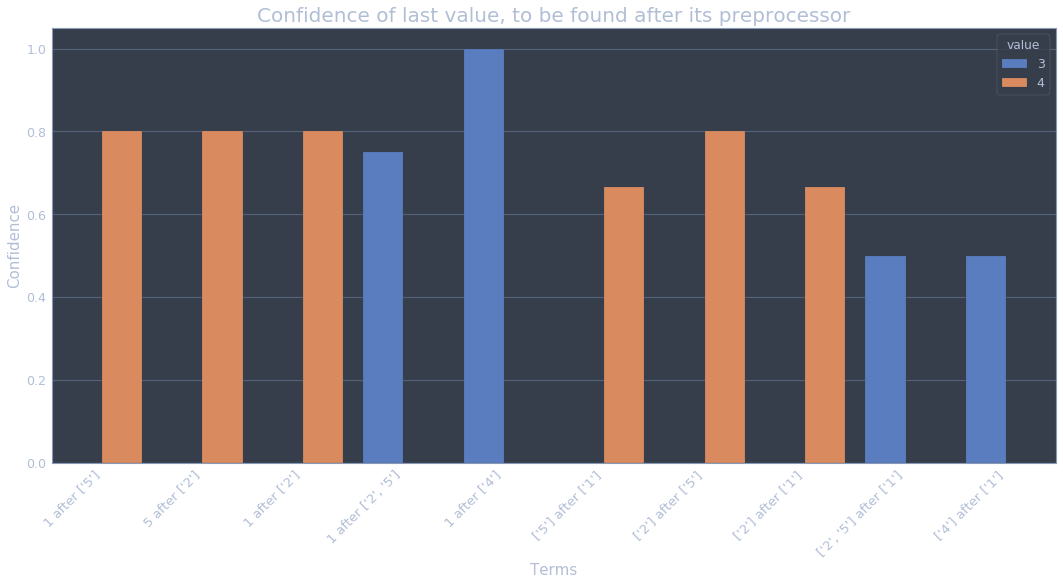

In [47]:
plt.figure(figsize=(18, 8))
g = sns.barplot(x="seq-str", y="confidence", hue="value",
                data= df_structured[df_structured.confidence!= -99], palette="muted")

g.set_xticklabels(g.get_xticklabels(), fontsize=13, rotation=45, horizontalalignment="right")

plt.title('Confidence of last value, to be found after its preprocessor', fontsize=20)
g.set_ylabel('Confidence', fontsize=15)
g.set_xlabel('Terms', fontsize=15); 